In this notebook, I will walk through solving a complete machine learning problem using  hypothetical weather conditions inside
a greenhouse dataset.

This is a supervised, regression machine learning task: given a set of data with targets (in this case the yield) included, we want to train a model that can learn to map the features (also known as the explanatory variables) to the target.

- Supervised problem: we are given both the features and the target
- Regression problem: the target is a continous variable, in this case ranging from 0.38-1.07

__The objective is to find a specific model for a greenhouse that can predict its
yield with the accuracy of more than 92%.__

### Machine Learning Workflow
The structure of the machine learning project will be as follows:

1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Establish a baseline and compare several machine learning models on performance metric (MAPE)
5. Perform hyperparameter tuning on the best model to optimize it for the problem
6. Evaluate the best model on the validation set and make prediction on the test set
7. Interpret the model results to the extent possible
8. Draw conclusions 

### Imports
I will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. I also use matplotlib and seaborn for visualization.

In [422]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
import random
from sklearn.model_selection import train_test_split

# Machine Learning Models
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# LIME for explaining predictions
import lime 
import lime.lime_tabular

### Data Cleaning and Formatting

#### Load in the Data and Examine

In [423]:
data = pd.read_csv('dataset.csv')

# Display top of dataframe
data.head()

week_num  yield         1         2         3         4  5         6  \
0  Week 48 FY15   0.57  0.765056 -0.356439  0.197052  0.795395  0 -0.001015   
1  Week 49 FY15   0.47  1.062557 -0.156156 -0.234454  0.950919  0 -0.170481   
2  Week 50 FY15   0.43  0.961968 -0.276802  0.106828  1.075338  0 -0.004001   
3  Week 51 FY15   0.49  0.864231 -0.411954  0.174596  1.168652  0  0.040849   
4  Week 52 FY15   0.57 -0.083462 -0.212342  0.110023  1.251599  0  0.021135   

          7         8         9        10        11        12        13  \
0  0.196354  0.081835  0.950103 -0.063364 -0.829207 -0.241069  1.456464   
1 -0.057973  0.362018  0.590900 -0.030287 -0.808753  0.520046 -0.331018   
2  0.110006  0.201414  0.516113 -0.016122 -0.772992  0.347968 -0.331018   
3  0.032461  0.311033  0.605321 -0.023123 -0.711317 -0.098511 -0.331018   
4 -0.133111  0.152851  0.944587  1.262242 -0.840133  1.034012 -0.331018   

         14        15        16        17        18        19        20  \
0 -0.330876  0.018767  0.260456 -0.067674  0.525733 -0.131478 -0.474496   
1  1.098410 -0.036730  1.044749 -0.154249  0.656448 -0.159455 -0.758297   
2  0.772261  0.225179  0.792992 -0.104244  0.553572 -0.175071 -0.563206   
3 -0.485911 -0.064177  0.610803 -0.110098  0.553419 -0.201746  0.084896   
4  0.471113 -0.287214  0.642511 -0.140182  0.083886 -0.212156 -0.806272   

         21        22        23        24        25        26        27  \
0 -0.229206 -0.436584 -0.391205 -0.291944 -0.394279  0.015729 -0.661840   
1 -0.190549 -0.332570  0.349147  0.341943 -0.310972  0.303210 -0.558677   
2  0.008438 -0.469626  0.413091  0.442866 -0.420743  0.414846 -0.595874   
3 -0.078933 -0.542146  0.656361  0.552064 -0.478825  0.474788 -0.449464   
4 -0.432690 -0.568484  0.453516  0.341360 -0.499920  0.375777 -0.458860   

         28    ...     4311      4312      4313      4314      4315      4316  \
0 -0.221699    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
1 -0.133704    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
2 -0.101545    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
3 -0.085681    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
4 -0.107713    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   

       4317      4318      4319      4320      4321      4322      4323  \
0 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
1 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
2 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
3 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
4 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   

       4324      4325      4326      4327      4328      4329      4330  \
0 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
1 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
2 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
3 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
4 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   

       4331     4332      4333      4334      4335      4336      4337  \
0 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
1 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
2 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
3 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
4 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   

       4338      4339      4340  
0 -0.981902 -0.995691 -0.800299  
1 -0.981902 -0.995691 -0.800299  
2 -0.981902 -0.995691 -0.800299  
3 -0.981902 -0.995691 -0.800299  
4 -0.981902 -0.995691 -0.800299  

[5 rows x 4342 columns]

Taking a look at the raw data, we can already see that the ranges of variables' values are not very different. Although all I know from the problem statement is that we want to predict the number in the yield column that  has a masure unit kg/m2, and the rest of the varibles are just numbered, I can make an educated guess and say that the variables have been standardized/normalized due to different unit measures and value ranges. 

### Data Types and Missing Values

Further, I will take a look at the data types to make sure they make sense(have the coressponding data type assumed correct)

In [424]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Columns: 4342 entries, week_num to 4340
dtypes: float64(4327), int64(14), object(1)
memory usage: 4.3+ MB


Most of the variables seem to be numeric, except the week number column beeing object type (string). To be later checked why 14 variables are innt64 and not float type. 

In [425]:
# Statistics for each column
data.describe()

yield           1           2           3           4      5  \
count  115.000000  131.000000  131.000000  131.000000  131.000000  131.0   
mean     0.675391    0.012175   -0.011646    0.032254    0.026639    0.0   
std      0.173095    0.992832    0.998961    0.974747    0.987683    0.0   
min      0.380000   -2.276594   -0.600320   -1.344745   -1.765569    0.0   
25%      0.525000   -0.726656   -0.445459   -0.786582   -0.733926    0.0   
50%      0.650000    0.131757   -0.351201   -0.017179    0.162930    0.0   
75%      0.820000    0.868233   -0.249513    0.689194    0.930182    0.0   
max      1.070000    1.711989    2.985258    2.743958    1.251599    0.0   

                6           7           8           9          10          11  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.061272   -0.039280   -0.022693    0.009954   -0.006165    0.010942   
std      0.671533    0.938874    0.968220    1.000330    1.008214    1.007417   
min     -0.428650   -7.752403   -8.845893   -3.391754   -0.186073   -0.885389   
25%     -0.277096   -0.212699   -0.212299   -0.212930   -0.125539   -0.753347   
50%     -0.149212    0.104851   -0.024938    0.185155   -0.110266   -0.408105   
75%      0.022078    0.409939    0.128273    0.416063   -0.081012    0.559834   
max      7.262550    1.142294    3.174728    7.053521   11.358507    3.373740   

               12          13          14          15          16          17  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.093526   -0.070380   -0.006834   -0.003581    0.007788    0.008028   
std      0.574728    0.820738    1.009729    1.010899    1.009461    1.009276   
min     -1.071456   -0.331018   -1.373330   -5.433454   -2.357776   -0.415026   
25%     -0.460810   -0.331018   -0.739639   -0.160585   -0.418765   -0.286940   
50%     -0.229996   -0.331018   -0.285495   -0.025708    0.314754   -0.104244   
75%      0.113267   -0.331018    0.653403    0.160909    0.789570    0.104917   
max      3.117461    4.307555    2.872462    6.954217    1.312071   11.140575   

               18          19          20          21          22          23  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.003892   -0.043079    0.019994    0.028660   -0.019106    0.000588   
std      1.000959    0.940680    0.998142    0.945582    0.973479    1.010564   
min     -3.336172   -0.240134   -1.307903   -7.622581   -0.568484  -10.386934   
25%     -0.653723   -0.220940   -0.637095   -0.097085   -0.544300   -0.175117   
50%      0.258382   -0.201746   -0.243295    0.129581   -0.334035    0.083081   
75%      0.736178   -0.179883    0.497446    0.415257    0.155760    0.368455   
max      2.087265    7.907794    3.220929    0.873747    4.481160    1.102200   

               24          25          26          27          28          29  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.000803   -0.025285    0.000811   -0.017509    0.005951    0.016551   
std      1.010149    0.953264    1.010806    0.983389    1.009957    1.002341   
min     -9.415406   -0.499920   -8.203347   -0.739742   -1.229447   -1.150176   
25%     -0.156850   -0.474049   -0.070744   -0.549544   -0.202120   -0.805935   
50%      0.126280   -0.310972    0.096966   -0.317995   -0.174289   -0.164899   
75%      0.348405    0.045178    0.338238    0.054899   -0.133377    0.484090   
max      1.056587    4.234904    0.828886    3.591991    7.193852    3.744339   

          ...            4311        4312        4313        4314        4315  \
count     ...      131.000000  131.000000  131.000000  131.000000  131.000000   
mean      ...        0.019847   -0.018212    0.015140   -0.012253    0.015139   
std       ...        0.998339    1.000419    1.003851    1.006448    1.003852   
min       ...       -1.300000   -1.036887   -0.991674   -1.021653   -0.991608   
25

#### Missing Values

Now that we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column. 

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. 

In [426]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [427]:
missing_values_table(data)

Your selected dataframe has 4342 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
yield              16               12.2

Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

What columns to retain may be a little arbitrary [here is a discussion](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/3), but for this project, if has been the case-  I would have removed  any columns with more than 50% missing values. 

__Here the only missing values are those in yield column, which correspond to the future trainig test split, so is as it is intentionally.__

In [428]:
# Get the columns with > 50% missing (generic)
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 4342 columns.
There are 1 columns that have missing values.
We will remove 0 columns.


In [429]:
#Select the int64 type variables for inspection
data.select_dtypes(include=['int64']).head(10)

5  315  625  935  1245  1555  1865  2175  2485  2795  3105  3415  3725  \
0  0    0    0    0     0     0     0     0     0     0     0     0     0   
1  0    0    0    0     0     0     0     0     0     0     0     0     0   
2  0    0    0    0     0     0     0     0     0     0     0     0     0   
3  0    0    0    0     0     0     0     0     0     0     0     0     0   
4  0    0    0    0     0     0     0     0     0     0     0     0     0   
5  0    0    0    0     0     0     0     0     0     0     0     0     0   
6  0    0    0    0     0     0     0     0     0     0     0     0     0   
7  0    0    0    0     0     0     0     0     0     0     0     0     0   
8  0    0    0    0     0     0     0     0     0     0     0     0     0   
9  0    0    0    0     0     0     0     0     0     0     0     0     0   

   4035  
0     0  
1     0  
2     0  
3     0  
4     0  
5     0  
6     0  
7     0  
8     0  
9     0

__It seems that these variables have constant value of zero, hence the int64 data type. Not sure if it's normal, as I am not aware of the columns significance.__

### Removing Outliers

When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an extreme outlier:

- On the low end, an extreme outlier is below  $\text{First Quartile} -1.5 * \text{Interquartile Range}$
- On the high end, an extreme outlier is above  $\text{Third Quartile} + 1.5 * \text{Interquartile Range}$

I will define a function that updates all the outliers with the appropriate value in all the columns in the dataset.

In [489]:
#function which takes input a dataframe(x) that can contain both numeric and categorical columns
def fixoutliers(x):
    #Get all the column name from the input dataframe x
       xColumnNames=x
       #keep the labels column as we do't want to alter it 
       y = xColumnNames['yield']
       xColumnNames.drop('yield', axis=1)
       #print(xColumnNames)
#go throug all collumns ans find whether the values are whiting the setted range:

       for j in xColumnNames:
            try:
              #print ("colnames ",j)
              xy=x[j]    
              mydata=pd.DataFrame()
        #make an empty list to add the uppdated values 
              updated=[]
              Q1,Q3=np.percentile(xy,[25,75])
              IQR=Q3-Q1
              minimum=Q1-1.5*IQR #maximum value
              maximum=Q3+1.5*IQR #minimum value
              for i in xy:   #alter columns if they are not in within the range
                 if(i>maximum):
                   #print("Entering maxim")
                   i=maximum
                   updated.append(i)
                 elif(i<minimum):
                  #print("enterinf minimum")
                  i=minimum
                  updated.append(i)
                 else:
                  updated.append(i)
              x[j]=updated #update the dataframe with the updated values
            except:
              continue
            
       x['yield']=y     #add back the labels column
       return x

In [490]:
#fixing outliers
new_data=fixoutliers(data)

C:\Users\Daniela\Anaconda3.5\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [432]:
#updated dataframe after fixing outliers
new_data.head()

week_num  yield         1         2         3         4  5         6  \
0  Week 48 FY15   0.57  0.765056 -0.356439  0.197052  0.795395  0 -0.001015   
1  Week 49 FY15   0.47  1.062557 -0.156156 -0.234454  0.950919  0 -0.170481   
2  Week 50 FY15   0.43  0.961968 -0.276802  0.106828  1.075338  0 -0.004001   
3  Week 51 FY15   0.49  0.864231 -0.411954  0.174596  1.168652  0  0.040849   
4  Week 52 FY15   0.57 -0.083462 -0.212342  0.110023  1.251599  0  0.021135   

          7         8         9        10        11        12        13  \
0  0.196354  0.081835  0.950103 -0.063364 -0.829207 -0.241069 -0.331018   
1 -0.057973  0.362018  0.590900 -0.030287 -0.808753  0.520046 -0.331018   
2  0.110006  0.201414  0.516113 -0.016122 -0.772992  0.347968 -0.331018   
3  0.032461  0.311033  0.605321 -0.023123 -0.711317 -0.098511 -0.331018   
4 -0.133111  0.152851  0.944587 -0.014222 -0.840133  0.974383 -0.331018   

         14        15        16        17        18        19        20  \
0 -0.330876  0.018767  0.260456 -0.067674  0.525733 -0.131478 -0.474496   
1  1.098410 -0.036730  1.044749 -0.154249  0.656448 -0.159455 -0.758297   
2  0.772261  0.225179  0.792992 -0.104244  0.553572 -0.175071 -0.563206   
3 -0.485911 -0.064177  0.610803 -0.110098  0.553419 -0.201746  0.084896   
4  0.471113 -0.287214  0.642511 -0.140182  0.083886 -0.212156 -0.806272   

         21        22        23        24        25        26        27  \
0 -0.229206 -0.436584 -0.391205 -0.291944 -0.394279  0.015729 -0.661840   
1 -0.190549 -0.332570  0.349147  0.341943 -0.310972  0.303210 -0.558677   
2  0.008438 -0.469626  0.413091  0.442866 -0.420743  0.414846 -0.595874   
3 -0.078933 -0.542146  0.656361  0.552064 -0.478825  0.474788 -0.449464   
4 -0.432690 -0.568484  0.453516  0.341360 -0.499920  0.375777 -0.458860   

         28    ...     4311      4312      4313      4314      4315      4316  \
0 -0.221699    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
1 -0.133704    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
2 -0.101545    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
3 -0.085681    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   
4 -0.107713    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608 -0.897575   

       4317      4318      4319      4320      4321      4322      4323  \
0 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
1 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
2 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
3 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   
4 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994 -1.285899   

       4324      4325      4326      4327      4328      4329      4330  \
0 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
1 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
2 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
3 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   
4 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988 -0.980759   

       4331     4332      4333      4334      4335      4336      4337  \
0 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
1 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
2 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
3 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   
4 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039 -1.036513   

       4338      4339      4340  
0 -0.981902 -0.995691 -0.800299  
1 -0.981902 -0.995691 -0.800299  
2 -0.981902 -0.995691 -0.800299  
3 -0.981902 -0.995691 -0.800299  
4 -0.981902 -0.995691 -0.800299  

[5 rows x 4342 columns]

In [433]:
# Statistics for each column in updated dataframe
new_data.describe()

yield           1           2           3           4      5  \
count  115.000000  131.000000  131.000000  131.000000  131.000000  131.0   
mean     0.675391    0.012175   -0.319763    0.032254    0.026639    0.0   
std      0.173095    0.992832    0.172818    0.974747    0.987683    0.0   
min      0.380000   -2.276594   -0.600320   -1.344745   -1.765569    0.0   
25%      0.525000   -0.726656   -0.445459   -0.786582   -0.733926    0.0   
50%      0.650000    0.131757   -0.351201   -0.017179    0.162930    0.0   
75%      0.820000    0.868233   -0.249513    0.689194    0.930182    0.0   
max      1.070000    1.711989    0.044404    2.743958    1.251599    0.0   

                6           7           8           9          10          11  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.113118    0.052832   -0.019941    0.052197   -0.102723   -0.007656   
std      0.194482    0.523170    0.296463    0.550490    0.034916    0.952971   
min     -0.428650   -1.146657   -0.723159   -1.156419   -0.186073   -0.885389   
25%     -0.277096   -0.212699   -0.212299   -0.212930   -0.125539   -0.753347   
50%     -0.149212    0.104851   -0.024938    0.185155   -0.110266   -0.408105   
75%      0.022078    0.409939    0.128273    0.416063   -0.081012    0.559834   
max      0.470839    1.142294    0.639133    1.359553   -0.014222    2.529605   

               12            13          14          15          16  \
count  131.000000  1.310000e+02  131.000000  131.000000  131.000000   
mean    -0.122928 -3.310184e-01   -0.008835    0.006114    0.008816   
std      0.473595  3.343455e-16    1.004106    0.272519    1.007099   
min     -1.071456 -3.310184e-01   -1.373330   -0.642826   -2.231267   
25%     -0.460810 -3.310184e-01   -0.739639   -0.160585   -0.418765   
50%     -0.229996 -3.310184e-01   -0.285495   -0.025708    0.314754   
75%      0.113267 -3.310184e-01    0.653403    0.160909    0.789570   
max      0.974383 -3.310184e-01    2.742967    0.643150    1.312071   

               17          18          19          20          21          22  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    -0.071727    0.005120   -0.197256   -0.002396    0.132116   -0.140989   
std      0.249999    0.973037    0.030170    0.938170    0.408033    0.489089   
min     -0.415026   -2.738574   -0.240134   -1.307903   -0.865598   -0.568484   
25%     -0.286940   -0.653723   -0.220940   -0.637095   -0.097085   -0.544300   
50%     -0.104244    0.258382   -0.201746   -0.243295    0.129581   -0.334035   
75%      0.104917    0.736178   -0.179883    0.497446    0.415257    0.155760   
max      0.692702    2.087265   -0.118297    2.199259    0.873747    1.205849   

               23          24          25          26          27          28  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean     0.072317    0.094681   -0.175510    0.108733   -0.181117   -0.167583   
std      0.440006    0.394875    0.362779    0.298533    0.471939    0.055647   
min     -0.990475   -0.914732   -0.499920   -0.684218   -0.739742   -0.305234   
25%     -0.175117   -0.156850   -0.474049   -0.070744   -0.549544   -0.202120   
50%      0.083081    0.126280   -0.310972    0.096966   -0.317995   -0.174289   
75%      0.368455    0.348405    0.045178    0.338238    0.054899   -0.133377   
max      1.102200    1.056587    0.824019    0.828886    0.961564   -0.030263   

               29     ...            4311        4312        4313        4314  \
count  131.000000     ...      131.000000  131.000000  131.000000  131.000000   
mean    -0.003357     ...        0.019847   -0.018212    0.015140   -0.012253   
std      0.943179     ...        0.998339    1.000419    1.003851    1.006448   
min     -1.150176     ...       -1.300000   -1.036887   -0.991674   -1.021653   
25%     -0.805935     ...       -1.300000   -1.036887   -0.991674   -1.021653   
50%     -0.

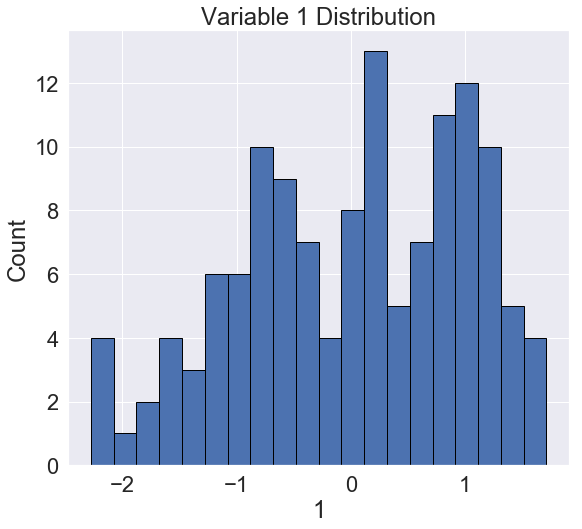

In [434]:
# Histogram Plot of variable 1
figsize(8, 8)
plt.hist(data['1'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('1'); 
plt.ylabel('Count'); plt.title('Variable 1 Distribution');

This plot looks close to normally distributed with a long tail on the left side (it has a negative skew).

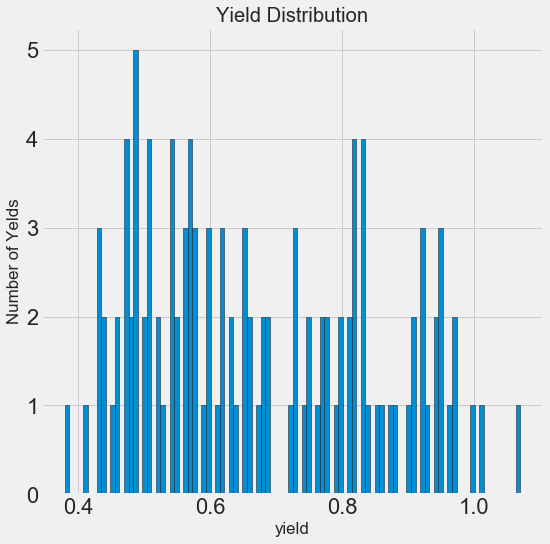

In [435]:
figsize(8, 8)
# Histogram of the yield
plt.style.use('fivethirtyeight')
plt.hist(new_data['yield'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('yield'); plt.ylabel('Number of Yelds'); 
plt.title('Yield Distribution');

The yield label seems also to have a normal distribution.

### Looking for Relationships

Since there are no categorical values to plot against the yield variable's values on a kernel density estimation plot, I will to focus on the numerical columns for predicting the yield.

#### Correlations between Features and Target

In order to quantify correlations between the features (variables) and the target (yield variable), we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated. 

In [436]:
# Find all correlations and sort 
correlations_data = new_data.corr()['yield'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

4      -0.803702
4126   -0.792725
1956   -0.792725
314    -0.789987
2484   -0.789987
3816   -0.788481
1646   -0.788481
3506   -0.783567
1336   -0.783567
4100   -0.776829
1930   -0.776829
2794   -0.771485
624    -0.771485
3196   -0.766431
1026   -0.766431
Name: yield, dtype: float64 

5      NaN
315    NaN
625    NaN
935    NaN
1245   NaN
1555   NaN
1865   NaN
2175   NaN
2485   NaN
2512   NaN
2795   NaN
3105   NaN
3415   NaN
3725   NaN
4035   NaN
Name: yield, dtype: float64


Correlation is calculated as folows : $cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]$

If the values of the ith or jth variable do not vary, then the respective standard deviation will be zero and so will the denominator of the fraction.
Thus, the correlation will be NaN. If there is no correlation, then in my opinion, the variables in cause should not be used in predicting the yield values.

In [437]:
#drop the columns with constant value of zero
new_data.drop(['5','315','625','935','1245','1555','1865','2175','2485','2795','3105','3415','3725','4035'], axis=1, inplace=True)

In [438]:
new_data.head()

week_num  yield         1         2         3         4         6  \
0  Week 48 FY15   0.57  0.765056 -0.356439  0.197052  0.795395 -0.001015   
1  Week 49 FY15   0.47  1.062557 -0.156156 -0.234454  0.950919 -0.170481   
2  Week 50 FY15   0.43  0.961968 -0.276802  0.106828  1.075338 -0.004001   
3  Week 51 FY15   0.49  0.864231 -0.411954  0.174596  1.168652  0.040849   
4  Week 52 FY15   0.57 -0.083462 -0.212342  0.110023  1.251599  0.021135   

          7         8         9        10        11        12        13  \
0  0.196354  0.081835  0.950103 -0.063364 -0.829207 -0.241069 -0.331018   
1 -0.057973  0.362018  0.590900 -0.030287 -0.808753  0.520046 -0.331018   
2  0.110006  0.201414  0.516113 -0.016122 -0.772992  0.347968 -0.331018   
3  0.032461  0.311033  0.605321 -0.023123 -0.711317 -0.098511 -0.331018   
4 -0.133111  0.152851  0.944587 -0.014222 -0.840133  0.974383 -0.331018   

         14        15        16        17        18        19        20  \
0 -0.330876  0.018767  0.260456 -0.067674  0.525733 -0.131478 -0.474496   
1  1.098410 -0.036730  1.044749 -0.154249  0.656448 -0.159455 -0.758297   
2  0.772261  0.225179  0.792992 -0.104244  0.553572 -0.175071 -0.563206   
3 -0.485911 -0.064177  0.610803 -0.110098  0.553419 -0.201746  0.084896   
4  0.471113 -0.287214  0.642511 -0.140182  0.083886 -0.212156 -0.806272   

         21        22        23        24        25        26        27  \
0 -0.229206 -0.436584 -0.391205 -0.291944 -0.394279  0.015729 -0.661840   
1 -0.190549 -0.332570  0.349147  0.341943 -0.310972  0.303210 -0.558677   
2  0.008438 -0.469626  0.413091  0.442866 -0.420743  0.414846 -0.595874   
3 -0.078933 -0.542146  0.656361  0.552064 -0.478825  0.474788 -0.449464   
4 -0.432690 -0.568484  0.453516  0.341360 -0.499920  0.375777 -0.458860   

         28        29    ...     4311      4312      4313      4314      4315  \
0 -0.221699 -1.141306    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608   
1 -0.133704 -1.096242    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608   
2 -0.101545 -1.017314    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608   
3 -0.085681 -0.889290    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608   
4 -0.107713 -1.150176    ...     -1.3 -1.036887 -0.991674 -1.021653 -0.991608   

       4316      4317      4318      4319      4320      4321      4322  \
0 -0.897575 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994   
1 -0.897575 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994   
2 -0.897575 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994   
3 -0.897575 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994   
4 -0.897575 -1.020315 -0.992045 -0.903636 -1.028505 -1.299491 -0.976994   

       4323      4324      4325      4326      4327      4328      4329  \
0 -1.285899 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988   
1 -1.285899 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988   
2 -1.285899 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988   
3 -1.285899 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988   
4 -1.285899 -0.811748 -0.965811 -0.991597 -0.752612 -1.001958 -0.929988   

       4330      4331     4332      4333      4334      4335      4336  \
0 -0.980759 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039   
1 -0.980759 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039   
2 -0.980759 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039   
3 -0.980759 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039   
4 -0.980759 -0.730907 -0.99136 -0.774115 -0.724674 -0.542333 -0.992039   

       4337      4338      4339      4340  
0 -1.036513 -0.981902 -0.995691 -0.800299  
1 -1.036513 -0.981902 -0.995691 -0.800299  
2 -1.036513 -0.981902 -0.995691 -0.800299  
3 -1.036513 -0.981902 -0.995691 -0.800299  
4 -1.036513 -0.981902 -0.995691 -0.800299  

[5 rows x 4328 columns]

In [439]:
#correlation coeficient for data without the variables with constant value
# Find all correlations 
correlations_data = new_data.corr()['yield'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(30))

4      -0.803702
4126   -0.792725
1956   -0.792725
314    -0.789987
2484   -0.789987
3816   -0.788481
1646   -0.788481
3506   -0.783567
1336   -0.783567
4100   -0.776829
1930   -0.776829
2794   -0.771485
624    -0.771485
3196   -0.766431
1026   -0.766431
Name: yield, dtype: float64 

2801     0.718458
2819     0.718631
631      0.718646
4047     0.724399
1877     0.724399
1863     0.731834
4033     0.731834
3723     0.735511
1553     0.735511
1567     0.735911
3737     0.735911
1243     0.740894
3413     0.740894
2483     0.745065
313      0.745065
1257     0.747874
3427     0.747874
3103     0.754794
933      0.754794
623      0.756456
2793     0.756456
17       0.757064
947      0.759665
3117     0.759665
2807     0.768588
637      0.768588
2497     0.773458
327      0.773458
yield    1.000000
2512          NaN
Name: yield, dtype: float64


To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the yield.
Bellow there is the function to performs the variables' square root and log transformation; in the case of this data set where there are many variables, the process is resourcess consuming and I won't perfom it.

In [440]:
# Select the numeric columns
#numeric_subset = new_data.select_dtypes('number')

# Create columns with square root and log of numeric columns
#for col in numeric_subset.columns:
     #Skip the yield column
    #if col == ['yield','week_num']:
        #next
    #else:
        #numeric_subset['sqrt_' + str(col)] = np.sqrt(numeric_subset[col])
        #numeric_subset['log_' + str(col)] = np.log(numeric_subset[col])

# Drop buildings without an energy star score
#features = numeric_subset.dropna(subset = ['yield'])

# Find correlations with the score 
#correlations = features.corr()['yeld'].dropna().sort_values()

In [441]:
#save the data set with a new name
features=new_data.copy()

#### Pairs Plot

As a final step for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

C:\Users\Daniela\Anaconda3.5\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Daniela\Anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


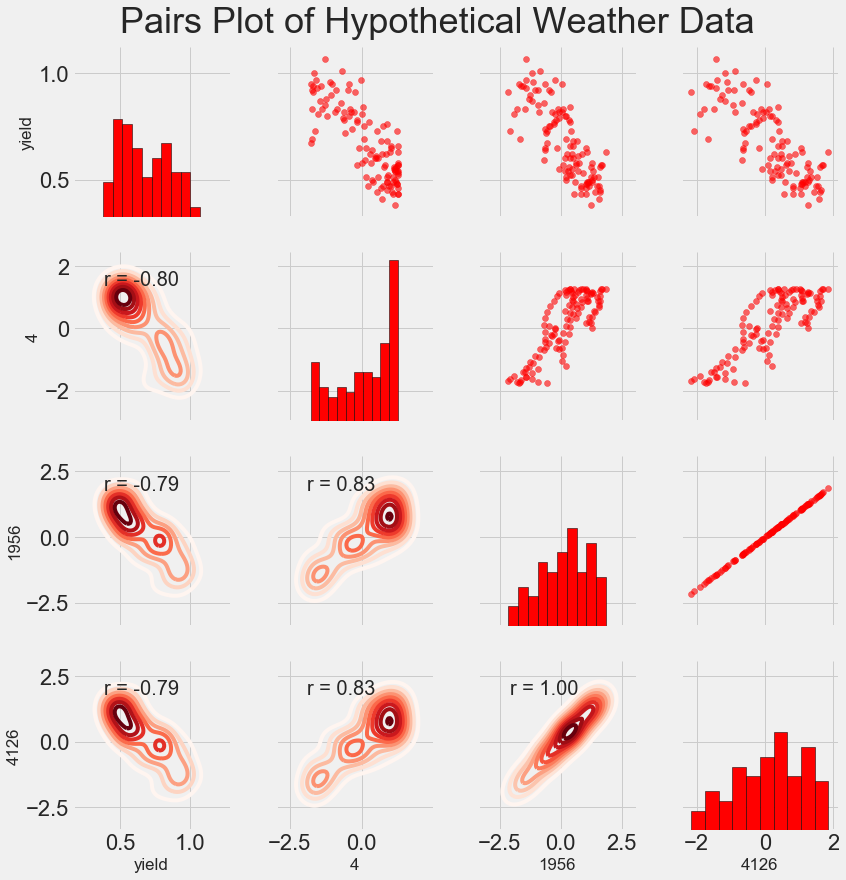

In [442]:
# Extract the columns to  plot
plot_data = features[['yield', '4', 
                      '1956', '4126']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Hypothetical Weather Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between yield and 4126, we look at the yield column and find 4126 row. At the intersection (the lower left plot) we see that the score has a -0.79 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

### Feature Engineering and Selection

For feature selection, I will remove the collinear features.
I will discuss collinearity (also called multicollinearity) when I get to that process!

First will plot the collinear feature into a heat map for inspection.

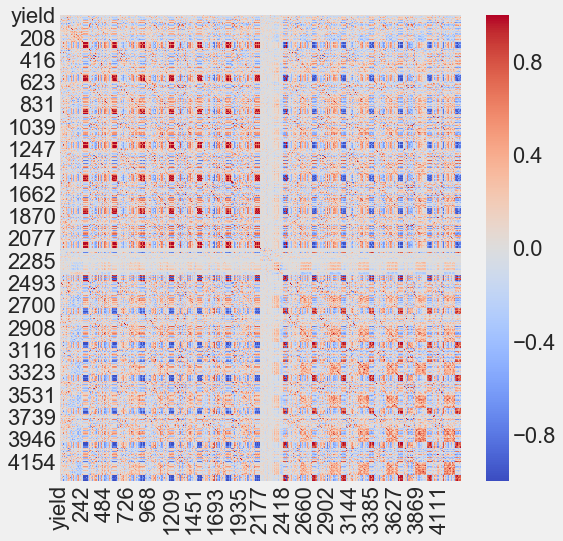

In [443]:
sns.heatmap(features.corr(), cmap="coolwarm")

It seems that the correlation coefficient has maximum value around 0.8 (both positive and negative).

#### Removing  Collinear Features

Highly collinear features have a significant correlation coefficent between them. Having highly correlated fetures (positive and negative) can impact the performance of model by multicollinearity. 

This can lead to misleading results, but luckily decision trees and boosted trees algorithms are immune to multicollinearity by nature.

Here I will remove the features that have a colinearity coefficient of 0.75 (which is close to the maximum coeficient, but many  of the features have coefficient around 0.8). Setting up a higher or lower threshold won't help impove much in algorithm performance.
As mentioned above, for this specific problem removing colinear feature is not necessary, as in the end I will be using a boosted tree type algortihm; it mostly helps in decreasing resources consume, as we will end up with less features to feed the algorithm.

In [444]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['yield']
    x = x.drop(columns = ['yield'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    # Add the score back in to the data
    x['yield'] = y
               
    return x

In [445]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.75);

C:\Users\Daniela\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


#### Additional Feature Selection

There are plenty of more methods for feature selection. Some popular methods include principal components analysis (PCA) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features. However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible.

In [446]:
features.to_csv('features.csv', index = False)
features = pd.read_csv('features.csv')
features.shape

(131, 554)

### Split Into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:

- Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target; I will split again this set into a train and validation set, as the test set is not containing the target values column. Since we are not dealling with classification and class imbalance, we do not need to do stratified subsampling. 
- Testing set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. 

Splitting the data into a random training and validation set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.

In [447]:
#split the data set into training and testing set as was indicated in the problem statement
train = features.iloc[0:115].copy()
test = features.iloc[115:131].copy()
#test = test.drop(columns='yield')

# Display sizes of data
print('Training Feature Size: ', train.shape)
print('Testing Feature Size:  ', test.shape)

Training Feature Size:  (115, 554)
Testing Feature Size:   (16, 554)


In [448]:
#save the training and testing set into .csv files
train.to_csv('train_final', index=False)
test.to_csv('test_final', index=False)

In [449]:
#save the target column and convert y to one-dimensional array (vector)
y =np.array(train['yield'])
# Remove the ids and target and convert X to  array (vector)
X =np.array (train.drop(columns = ['week_num', 'yield']))



In [450]:
def mape(y_true, y_pred):
    return (np.mean(abs((y_true - y_pred)/y_true)))*100

### Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:
    
1. Base-line model which is a naive gues based on median values
2. Linear Regression
3. Random Forest Regression
4. Light Gradient Boosting Regression
5. Gradient Boosting Regression
6. K-Nearest Neighbors Regression
7. Support Vector Machine Regression

In [451]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
baseline_guess = np.median(y)
err = mape(y_valid, baseline_guess)
print('MAPE = ' + str(err))

MAPE_baseline = err

MAPE = 21.51906573076165


In [452]:
# Takes in a model, trains the model, and evaluates the model on the validation set
def fit_and_evaluate(model):

    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(x_train, y_train)
    
     # Make predictions and evalute
    preds = model.predict(x_valid)
    err = mape(y_valid, preds)
    print('MAPE = ' + str(err))
    
    MAPE=err
    # Return the performance metric list
    return  MAPE

In [453]:
lr = LinearRegression()
lr_mape = fit_and_evaluate(lr)

MAPE = 16.15309448780313


In [454]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mape = fit_and_evaluate(random_forest)

MAPE = 8.99545317633642


In [455]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_mape = fit_and_evaluate(knn)

MAPE = 15.66753359085877


In [456]:
gradient_boosted = GradientBoostingRegressor()
gradient_boosted_mape = fit_and_evaluate(gradient_boosted)

MAPE = 8.603293440600064


In [457]:
lgbm = lgb.LGBMRegressor()
lgbm_mape = fit_and_evaluate(lgbm)

MAPE = 8.78521446433091


In [458]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mape = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mape)

MAPE = 26.660652256377805
Support Vector Machine Regression Performance on the test set: MAE = 26.6607


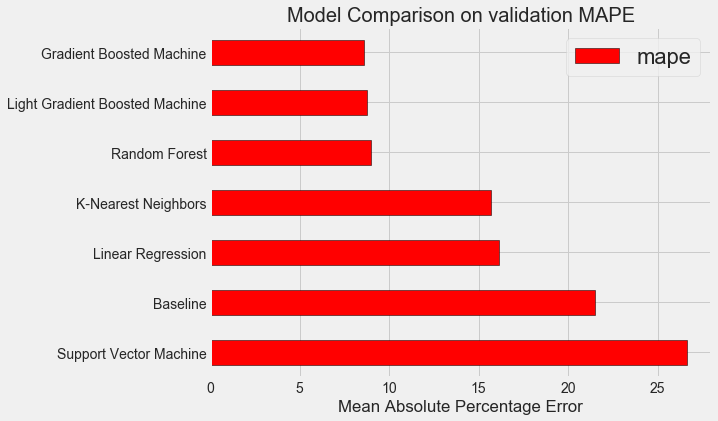

In [459]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'Random Forest', 'Light Gradient Boosted Machine', 'Gradient Boosted Machine',
                                            'K-Nearest Neighbors', 'Support Vector Machine', 'Baseline'],
                                 'mape': [lr_mape, random_forest_mape, 
                                         lgbm_mape,gradient_boosted_mape, knn_mape, svm_mape,MAPE_baseline]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mape', ascending = False).plot(x = 'model', y = 'mape', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Percentage Error'); plt.xticks(size = 14)
plt.title('Model Comparison on validation MAPE', size = 20);

Depending on the run (the exact results change slighty each time), the Gradient Boosting Regressor performs the best followed by Light Gradient Boosting Regressor and the random forrest regressor. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. (the random forest and gradient boosting methods are great for starting out because the performance is less dependent on the model settings). I will continue working with gradient boosting regressor (and not random forrest) and optimizing the best model using hyperparamter tuning. Here are the reasons:

- RF (Random Forest) uses decision trees, which are very prone to overfitting. In order to achieve higher accuracy, RF decides to create a large number of them based on bagging. The basic idea is to resample the data over and over and for each sample train a new classifier. Different classifiers overfit the data in a different way, and through voting those differences are averaged out.
- GBM is a boosting method, which builds on weak classifiers. The idea is to add a classifier at a time, so that the next classifier is trained to improve the already trained ensemble ( selection of sample is made more intelligently, subsequently giving more and more weight to hard to classify observations). Notice that for RF each iteration the classifier is trained independently from the rest.



### Model Optimization

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

#### Hyperparameters

First,  to understand what model hyperparameters are in contrast to model parameters :

- Model hyperparameters are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression.
- Model parameters are what the model learns during training, such as the weights in the linear regression.

We control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features).

Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression.. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set.

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn. Even better, new libraries, such as TPOT and HyperOpt (Bayesian Hyperparameter Optimization), is aiming to do this process automatically ! For now, I will stick to doing this manually (sort of) in Scikit-Learn!

### Hyperparameter Tuning with Random Search and Cross Validation
We can choose the best hyperparameters for a model through random search and cross validation.

- Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.
- Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we did not train on. 
At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.

Here I will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. I will first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance.

In [460]:
# Loss function to be optimized
loss = ['ls']
#loss = ['ls', 'lad', 'huber']
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10, 12]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [461]:
#Split the training set into train and validation set
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 42)
model =GradientBoostingRegressor()

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)
random_cv.fit(x_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.1s finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10, 12], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [462]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       0.039743      0.002046           0.0005    5.001428e-04   
24       0.202966      0.005338           0.0010    4.578320e-07   
5        0.314700      0.003960           0.0010    3.769729e-07   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
11                100                       4                      1   
24                900                      12                      8   
5                1500                      10                      2   

   param_max_features param_max_depth param_loss  \
11               sqrt               2         ls   
24               sqrt               3         ls   
5                sqrt              15         ls   

                                               params  split0_test_score  \
11  {'n_estimators': 100, 'min_samples_split': 4, ...          -0.054306   
24  {'n_estimators': 900, 'min_samples_split': 12,...          -0.071192   
5   {'n_estimators': 1500, 'min_samples_split': 10...          -0.066434   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
11          -0.057804          -0.084480          -0.071910        -0.067125   
24          -0.062028          -0.074844          -0.069855        -0.069480   
5           -0.053679          -0.078538          -0.080963        -0.069903   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
11        0.011993                1           -0.004404           -0.004081   
24        0.004674                2           -0.000178           -0.000170   
5         0.010864                3           -0.000226           -0.000232   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
11           -0.004255           -0.005858         -0.004650         0.000707  
24           -0.000173           -0.000200         -0.000180         0.000012  
5            -0.000217           -0.000225         -0.000225         0.000005

In [463]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

The best gradient boosted model has the following hyperparameters:

- loss = ls
- n_estimators = 100
- max_depth = 10
- min_samples_leaf = 4
- min_samples_split = 6
- max_features = 'None'

Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.

In [464]:

trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'ls', max_depth = 2,
                                  min_samples_leaf = 4,
                                  min_samples_split = 6,
                                  max_features =None,
                                  n_estimators=100,
                                  random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)
grid_search.fit(x_train, y_train)
    
    

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.6s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [465]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.262958      0.080836         0.000250        0.000433   
1       0.552162      0.044587         0.001251        0.000434   
2       0.678394      0.065337         0.001000        0.001225   
3       0.632900      0.047653         0.000500        0.000500   
4       0.545914      0.020159         0.000750        0.000433   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}          -0.078920   
1                150  {'n_estimators': 150}          -0.078552   
2                200  {'n_estimators': 200}          -0.078586   
3                250  {'n_estimators': 250}          -0.078586   
4                300  {'n_estimators': 300}          -0.078586   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0          -0.061551          -0.071311          -0.078694        -0.072619   
1          -0.061534          -0.071282          -0.078204        -0.072393   
2          -0.061491          -0.071260          -0.078161        -0.072375   
3          -0.061491          -0.071260          -0.078161        -0.072375   
4          -0.061491          -0.071260          -0.078161        -0.072375   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007085               15           -0.002180           -0.002165   
1        0.006907               14           -0.000521           -0.000492   
2        0.006924                1           -0.000249           -0.000255   
3        0.006924                1           -0.000249           -0.000255   
4        0.006924                1           -0.000249           -0.000255   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0           -0.001703           -0.002508         -0.002139         0.000287  
1           -0.000364           -0.000561         -0.000485         0.000074  
2           -0.000255           -0.000260         -0.000255         0.000004  
3           -0.000255           -0.000260         -0.000255         0.000004  
4           -0.000255           -0.000260         -0.000255         0.000004

In [466]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [467]:
%%timeit -n 1 -r 5
default_model.fit(x_train, y_train)

413 ms ± 20 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [468]:
%%timeit -n 1 -r 5
final_model.fit(x_train, y_train)

488 ms ± 41.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [469]:
default_pred = default_model.predict(x_valid)
final_pred = final_model.predict(x_valid)

print('Default model performance on the validation set: MAPE = %0.4f.' % mape(y_valid, default_pred))
print('Final model performance on the validation set:   MAPE = %0.4f.' % mape(y_valid, final_pred))

Default model performance on the validation set: MAPE = 8.5393.
Final model performance on the validation set:   MAPE = 7.4867.


The final model does out-perform the baseline model by about 10%, and at the cost of very slightly increased running time. Machine learning is often a field of tradeoffs: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, the increase in run time is not an impediment; in a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

To get a sense of the predictions, we can plot the distribution of true values on the validation set and the predicted values on the validation set.

C:\Users\Daniela\Anaconda3.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


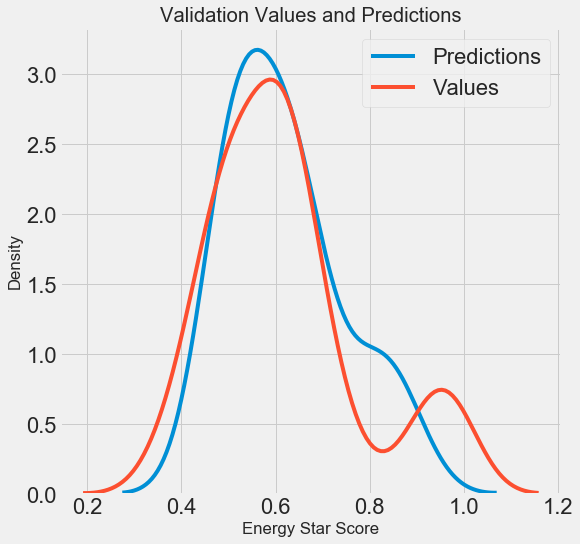

In [470]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_valid, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Validation Values and Predictions');

The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the validation values rather than to the actual peak at 0.6 and 1.0. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

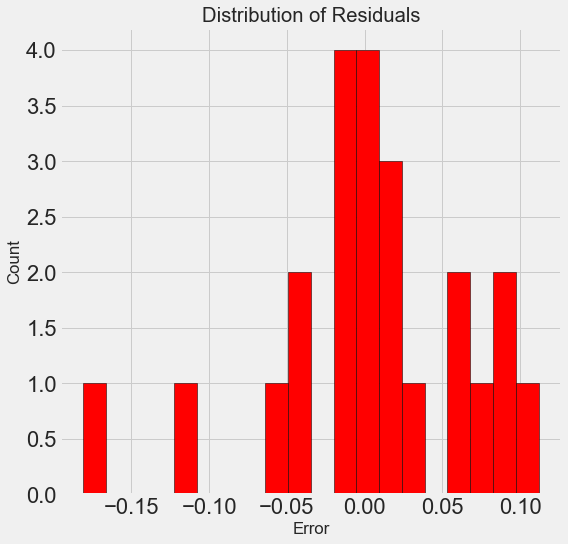

In [471]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_valid

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally disributed, with a few noticeable outliers on the low end. These indicate errors where the model estimate was below that of the true value.

### Preparing the testing set and make prediction

In [472]:
#save the ids for test set 
ids_test = test['week_num']
# Remove the ids and target
X_test = test.drop(columns = ['week_num', 'yield'])
X_test = np.array(X_test)

In [473]:
#make prediction on the test set
preds = final_model.predict(X_test)

In [474]:
# Prepare submission
subm = pd.DataFrame()
subm['week_num'] = ids_test.values
subm['yield'] = preds
subm.to_csv('submission_gbm.csv', index=False)

### Feature Importances

One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. These can be interpreted as the variables which are most predictive of the target. While the actual details of the feature importances are quite complex ([here is a Stack Overflow question on the subject](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)), we can use the relative values to compare the features and determine which are most relevant to our problem.

In [475]:
train_features = train.drop(columns = ['week_num', 'yield'])
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0       4    0.047800
1      62    0.023703
2    1144    0.022820
3    2393    0.022171
4    2297    0.020770
5    2226    0.019661
6    2267    0.018839
7       2    0.016693
8    2179    0.016467
9    2241    0.015411

We could use feature importance to perform feature selection; however, this is not an important process when using boosting trees algorithm as is for a linear model as linear regression.
It might bring the actual model to perform even poorer.

I will extract the most 10 important features and train both a linear regression and a boosting tree algorithm and compare their performance.

In [476]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train.columns).index(x) for x in most_important_features]

# Keep only the most important features
x_train_reduced = x_train[:, indices]
x_valid_reduced = x_valid[:, indices]

print('Most important training features shape: ', x_train_reduced.shape)
print('Most important validation  features shape: ', x_valid_reduced.shape)

Most important training features shape:  (92, 10)
Most important validation  features shape:  (23, 10)


In [477]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(x_train, y_train)
lr_full_pred = lr.predict(x_valid)

# Fit on reduced set of features
lr.fit(x_train_reduced, y_train)
lr_reduced_pred = lr.predict(x_valid_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mape(y_valid, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mape(y_valid, lr_reduced_pred))

Linear Regression Full Results: MAE =    16.1531.
Linear Regression Reduced Results: MAE = 15.2784.


Well, reducing the features did improve the linear regression results! It turns out that eliminating the features with low importance do actually improve performance in case of linear regression.

In [478]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=4,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

# Fit and test on the reduced set of features
model_reduced.fit(x_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(x_valid_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mape(y_valid, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 15.7505


It seems that it does not happen the same thing for the gradient boosting algorithm, where the extra information in the features with low importance improve performance.

### Locally Interpretable Model-agnostic Explanations

I will use LIME to explain individual predictions made by the model. LIME is aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

I will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct(well, slmodt correct!). 
I will restrict to using the reduced set of 10 features to aid interpretability. The model trained on the 10 most important features is much less accurate, but we generally have to trade off accuracy for interpretability!

In [479]:
# Find the residuals
y_valid= np.array(y_valid)
residuals = abs(model_reduced_pred - y_valid)
    
# Exact the worst and best prediction
wrong = x_valid_reduced[np.argmax(residuals), :]
right = x_valid_reduced[np.argmin(residuals), :]

In [480]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = x_train_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 0.8343
Actual Value: 0.5700


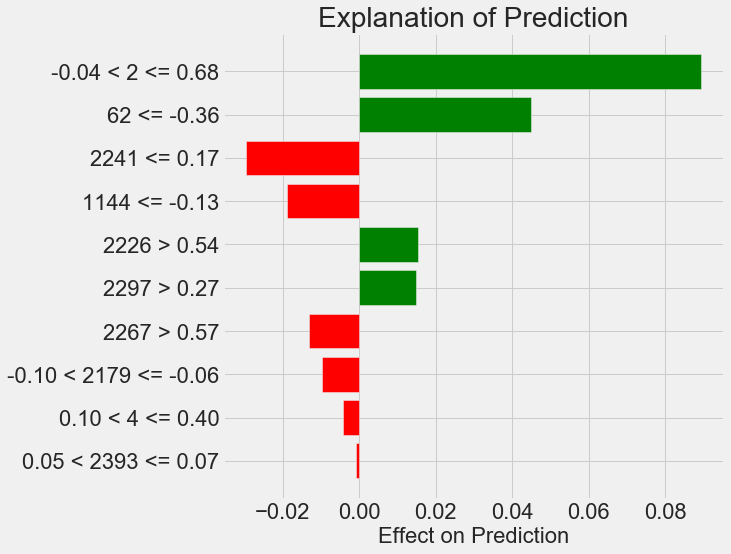

In [481]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_valid[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [483]:
wrong_exp.show_in_notebook(show_predicted_value=False)

In this example, our gradient boosted model predicted a yield of 0.8343 and the actual value was 0.57.

The plot from LIME is showing us the contribution to the final prediction from each of the features for the example. We can see that variable 2  increased the prediction because it was under 0.68. The variable 2241 on the other hand, dicreased the prediction because it was equal tp 0.17.

We can interpret this as saying that our model thought the yield would be much higher than it actually was because the variable 4 was high. However, in this case, the yield was 0.57 despite the high value of the variable 4. While this significant mistake (off by 0.264!) might initially have been confusing, now we can see that in reality, the model was reasoning through the problem and just arrived at the incorrect value! A human going over the same process probably would have arrived at the same conclusion (if they had the patience to go through all the data).

Now we can go through the same process with a prediction the model got correct.

Prediction: 0.6194
Actual Value: 0.6200


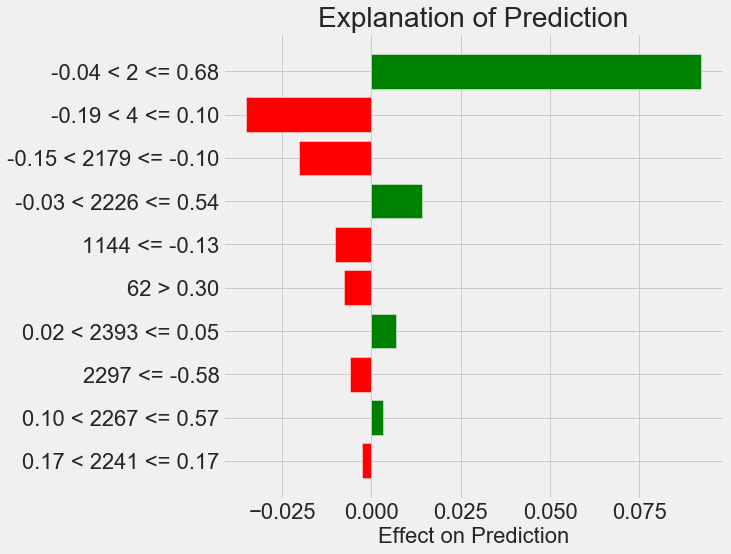

In [484]:
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_valid[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [485]:
right_exp.show_in_notebook(show_predicted_value=False)

The correct value for this case was 0.6194 which our gradient boosted model got almost right with 0.62 !

The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example. For instance, because the variable 2 was more than -0.04, that contributed slightly significant to a higher estimate of the yield. Likewise, the variable 4 being equal to -0.08  also negatively contributed to the final prediction.

Observing break down plots like these allow us to get an idea of how the model makes a prediction. This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually. 

### Examining a Single Decision Tree

One of the best part about a tree-based ensemble is that we can look at any individual estimator. Although the final model is composed of 200 decision trees, and looking at a single one is not indicative of the entire model, it still allows us to see the general idea of how a decision tree works. From there, it is a natural extension to imagine hundreds of these trees building off the mistakes of previous trees to make a final prediction (this is a significant oversimplification of how [gradient boosting regression works!](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html))

I will first extract a tree from the forest and then save it using sklearn.tree.export_graphviz. This saves the tree as a .dot file which can be converted to a png using command line instructions Anaconda terminal.

In [486]:
# Extract a single tree
import pydotplus
single_tree = model_reduced.estimators_[105][0]

export_graphviz(single_tree, out_file = 'images/tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=6,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x00000288A70889D8>,
           splitter='best')

In [103]:
# Convert to a png from the command line
# This requires the graphviz visualization library (https://www.graphviz.org/)

#from command line transform from .dot tp .png
# dot -Tpng images/tree.dot -o images/tree.png


<img src="images/tree.png">

Now we can take a look at the tree and try to intrepret it's decisions! The best way to think of a decision tree is as a series of yes/no questions, like a flowchart. We start at the top, called the root, and move our way down the tree, with the direction of travel determined by the answer to each equation.

For instance, here the first question we ask is: is the variable 2257 less than or equal to -0.031? If the answer is yes, then we move to the left and ask the question: is the variable 2257 less than or equal to -0.061? If the answer to the first question was no, we move to the right and ask the question is the variable 169 less than or equal to -0.176?

We continue this iterative process until we reach the bottom of the tree and end up in a leaf node. Here, the value we predict corresponds to the value shown in the node (the values in this tree appear to be the actual predictions divided by 100).

Each node has four different pieces of information:

The question: based on this answer we move right or left to the next node a layer down in the tree
The friedman_mse: a measure of the error for all of the examples in a given node
The samples: number of examples in a node
The value: the prediction of the target for all examples in a node


### Conclusion

This is a small tree, where the model estimates the same value for each example in a node; however there is not a larger error because (this is my guessing) all of the examples have the same target value.
However, with a bigger tree depth, the model would have a greater error.

In this case, and also to answer the question __"What will make this problem set easier to solve?"__, the algorithm would most probably do better with a larger data set (i.e. imput from more weeks), and could also grow in depth (not too large, as too large tree algorithms can lead to overfitting).

As an alternative model, I would use a Bayesian regression model, for which I would use Markov Chain Monte Carlo and the data to find most likely parameters for the selected posterior distribution, and further use the posterior probability as the prior for applying Bayes Rule using additional hypothetical weather conditions data. I would set this model to give me interval predictions, as this is more correctly than just a single value.